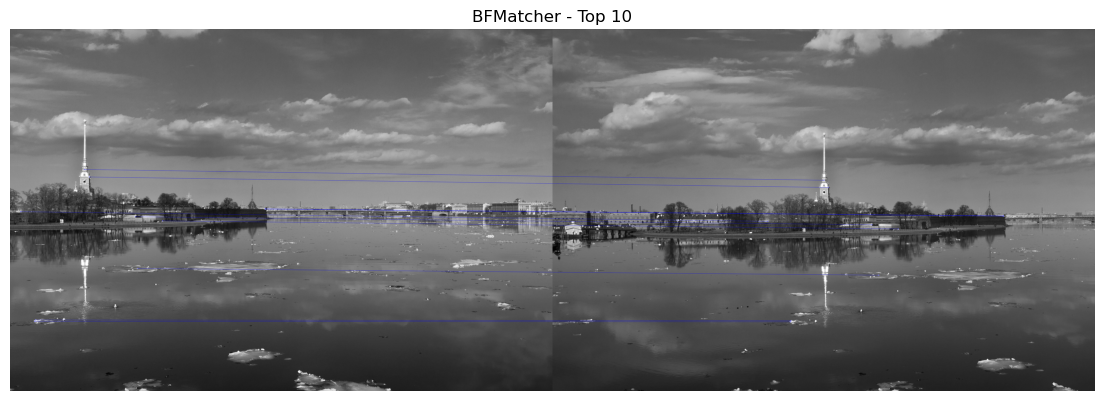

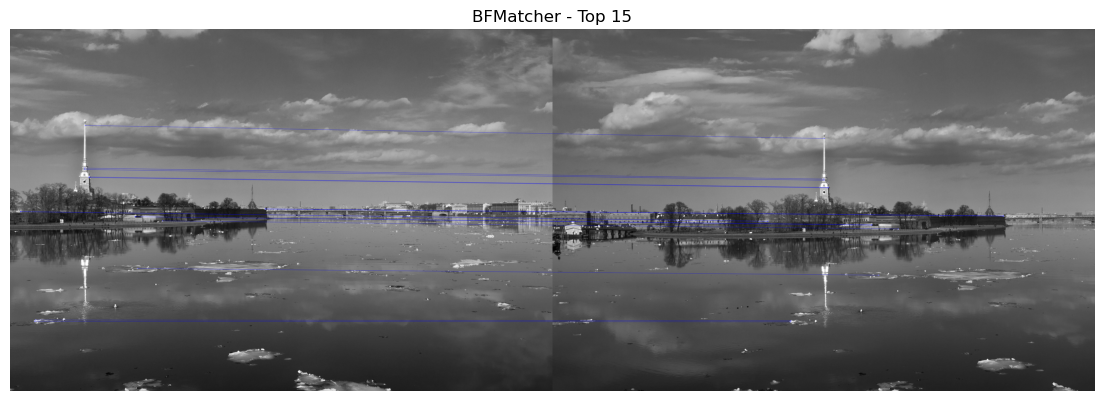

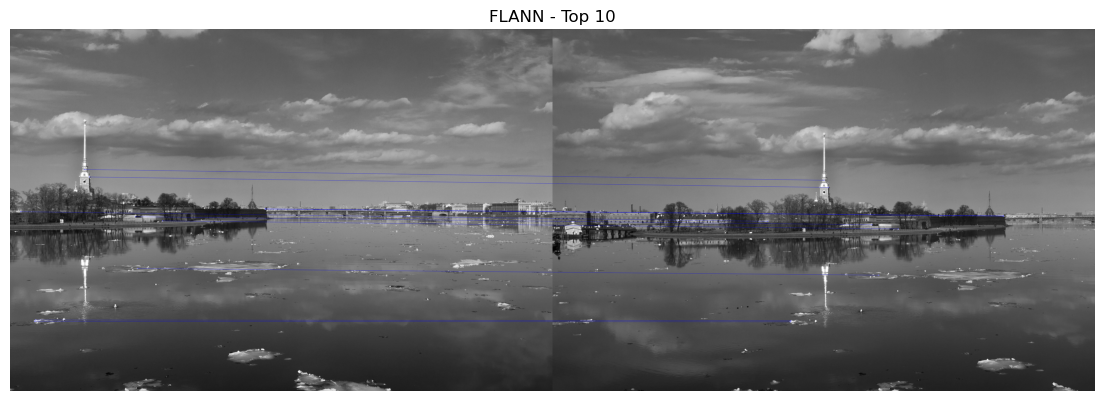

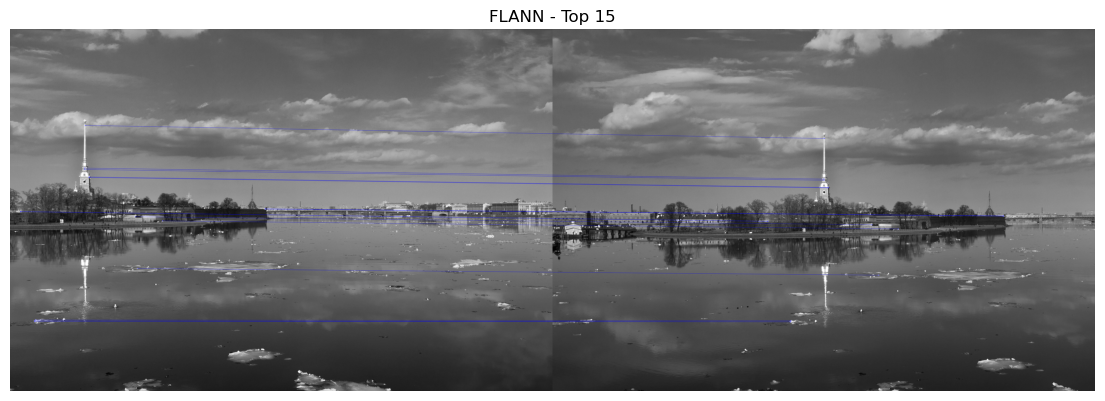

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('pictures/boat3.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('pictures/boat2.jpg', cv2.IMREAD_GRAYSCALE)

# ORB detector
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


# BFMatcher 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_bf = sorted(bf.match(des1, des2), key=lambda x: x.distance)

# FLANN Matcher 
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# knnMatch with k=2
knn_matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe’s ratio test
good_matches = []
for m, n in knn_matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Sort good matches by distance
matches_flann = sorted(good_matches, key=lambda x: x.distance)

# Show matches
def show_matches(title, img1, kp1, img2, kp2, matches):
    match_img = cv2.drawMatches(
        img1, kp1, img2, kp2, matches, None,
        matchColor=(255, 0, 0),  # Blue in BGR
        singlePointColor=(255, 255, 255),  # White circles
        flags=0  # Draw all keypoints and match lines
    )

    plt.figure(figsize=(14, 6))
    plt.title(title)
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))  
    plt.axis('off')  # Optional: remove axis ticks for cleaner output
    plt.show()


# Display
show_matches("BFMatcher - Top 10", img1, kp1, img2, kp2, matches_bf[:10])
show_matches("BFMatcher - Top 15", img1, kp1, img2, kp2, matches_bf[:15])
show_matches("FLANN - Top 10", img1, kp1, img2, kp2, matches_flann[:10])
show_matches("FLANN - Top 15", img1, kp1, img2, kp2, matches_flann[:15])


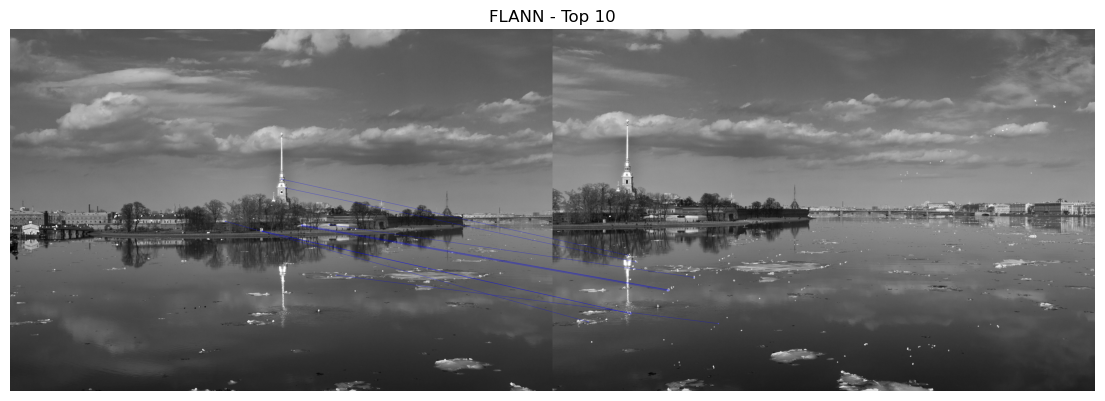

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load images
img1 = cv2.imread('pictures/boat2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('pictures/boat3.jpg', cv2.IMREAD_GRAYSCALE)

# Rotate boat3.jpg by 25 degrees counterclockwise
(h, w) = img2.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 25, 1.0)
rotated_img2 = cv2.warpAffine(img2, rotation_matrix, (w, h))

# ORB detection
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(rotated_img2, None)

# FLANN Matcher setup
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# knnMatch (k=2)
knn_matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test with safe unpacking
good_matches = []
for pair in knn_matches:
    if len(pair) == 2:
        m, n = pair
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

# Sort matched
matches_flann_rotate = sorted(good_matches, key=lambda x: x.distance)


# Show matches
def show_matches(title, img1, kp1, img2, kp2, matches):
    match_img = cv2.drawMatches(
        img1, kp1, img2, kp2, matches, None,
        matchColor=(255, 0, 0),  # Blue in BGR
        singlePointColor=(255, 255, 255),  # White circles
        flags=0  # Draw all keypoints and match lines
    )

    plt.figure(figsize=(14, 6))
    plt.title(title)
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))  
    plt.axis('off')  # Optional: remove axis ticks for cleaner output
    plt.show()

show_matches("FLANN - Top 10", img1, kp1, img2, kp2, matches_flann_rotate[:10])



Optional

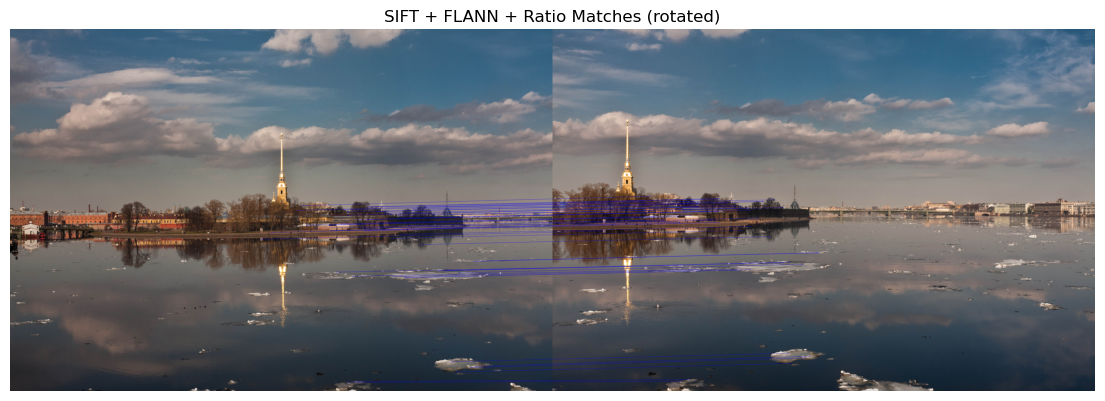

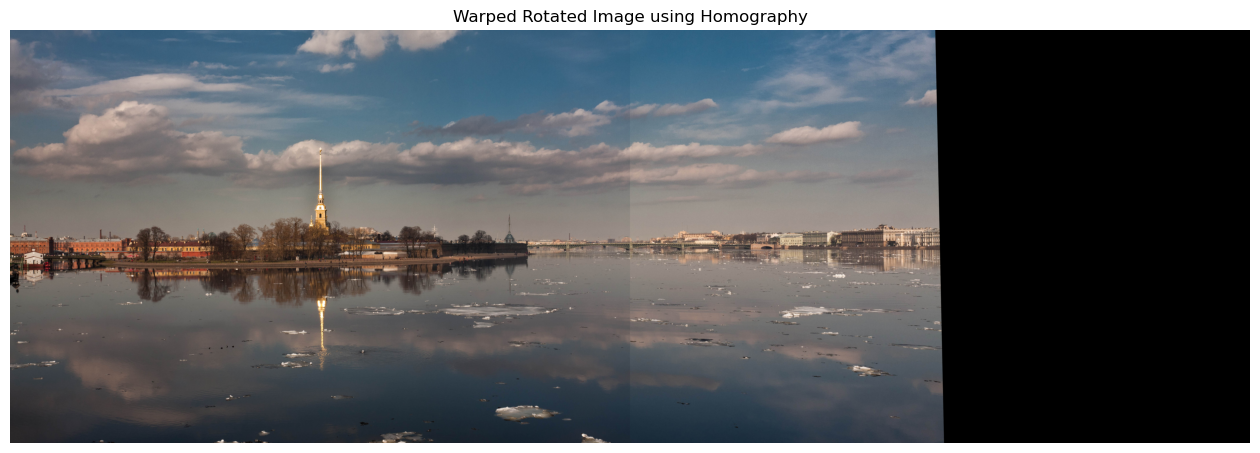

📷 Attempting automatic panorama stitching...


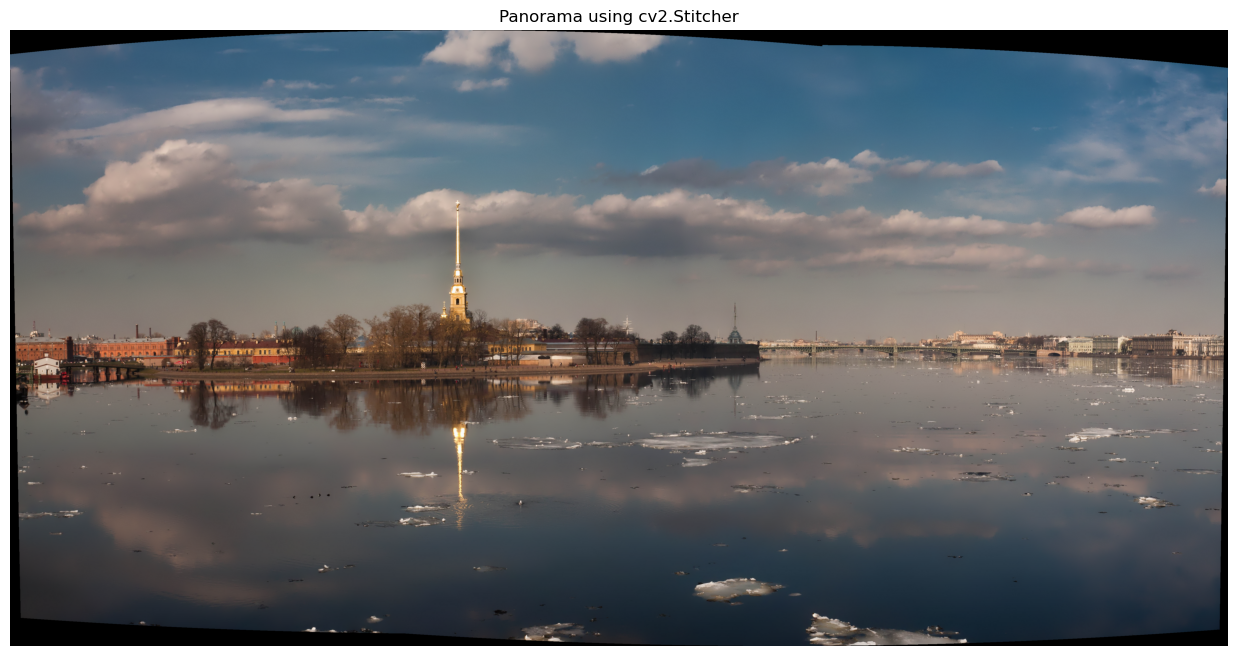

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load color images
img1 = cv2.imread('pictures/boat2.jpg')  # left image
img2 = cv2.imread('pictures/boat3.jpg')  # right image


# Convert to grayscale for SIFT
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# FLANN matcher + Lowe’s Ratio Test
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


matches_flann_rotate = sorted(good_matches, key=lambda x: x.distance)


def show_matches(title, img1, kp1, img2, kp2, matches):
    match_img = cv2.drawMatches(
        img1, kp1, img2, kp2, matches, None,
        matchColor=(255, 0, 0),        # white lines
        singlePointColor=(0, 255, 0),      # green keypoints
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(14, 6))
    plt.title(title)
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# 👇 Show matches
show_matches("SIFT + FLANN + Ratio Matches (rotated)", img1, kp1, img2, kp2, matches_flann_rotate[:50])

# Homography
if len(matches_flann_rotate) >= 4:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches_flann_rotate]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches_flann_rotate]).reshape(-1, 1, 2)
    H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Warp image 2
    height, width, _ = img1.shape
    warped_img2 = cv2.warpPerspective(img2, H, (width + img2.shape[1], height))
    warped_img2[0:height, 0:width] = img1  # overlay

    plt.figure(figsize=(16, 8))
    plt.title("Warped Rotated Image using Homography")
    plt.imshow(cv2.cvtColor(warped_img2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("❌ Not enough matches to compute homography.")

# Optional: Auto stitching
print("📷 Attempting automatic panorama stitching...")
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([img1, img2])

if status == cv2.Stitcher_OK:
    plt.figure(figsize=(16, 8))
    plt.title("Panorama using cv2.Stitcher")
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("❌ Stitching failed with error code:", status)
